In [5]:
from matplotlib import pyplot as plt
import pandas as pd
import numpy as np
from sklearn.preprocessing import MinMaxScaler
from keras.models import Sequential
from keras.layers import LSTM, Dense, Activation

In [6]:
blt=pd.read_csv('blt.csv')

In [7]:
blt_data=pd.DataFrame(blt['Value'])
blt_data['Value'][0]=blt_data['Value'][1]
for i in range(len(blt_data['Value']-1)):
    if(blt_data['Value'][i]==0):
        blt_data['Value'][i]=blt_data['Value'][i-1]


In [8]:
blt_data=pd.DataFrame(blt['Value'])
blt_data.index=blt['Date']
blt_data

,Value
Date,
2022-06-16,4.24
2022-06-15,4.33
2022-06-14,4.48
2022-06-13,4.32
2022-06-10,4.33
...,...
2017-03-15,7.19
2017-03-14,7.23
2017-03-13,7.28


Epoch 1/100
1/1 [==============================] - 7s 7s/step - loss: 0.1119 - val_loss: 0.0412
Epoch 2/100
1/1 [==============================] - 0s 100ms/step - loss: 0.0335 - val_loss: 0.0032
Epoch 3/100
1/1 [==============================] - 0s 101ms/step - loss: 0.0023 - val_loss: 6.0835e-04
Epoch 4/100
1/1 [==============================] - 0s 95ms/step - loss: 0.0013 - val_loss: 0.0023
Epoch 5/100
1/1 [==============================] - 0s 83ms/step - loss: 0.0016 - val_loss: 4.6454e-04
Epoch 6/100
1/1 [==============================] - 0s 90ms/step - loss: 0.0011 - val_loss: 0.0020
Epoch 7/100
1/1 [==============================] - 0s 79ms/step - loss: 0.0014 - val_loss: 4.7290e-04
Epoch 8/100
1/1 [==============================] - 0s 76ms/step - loss: 0.0011 - val_loss: 0.0021
Epoch 9/100
1/1 [==============================] - 0s 81ms/step - loss: 0.0015 - val_loss: 6.0795e-04
Epoch 10/100
1/1 [==============================] - 0s 87ms/step - loss: 0.0013 - val_loss: 0.0026
Epo

1/1 [==============================] - 0s 74ms/step - loss: 0.0015 - val_loss: 4.9036e-04
Epoch 82/100
1/1 [==============================] - 0s 78ms/step - loss: 0.0012 - val_loss: 0.0020
Epoch 83/100
1/1 [==============================] - 0s 76ms/step - loss: 0.0014 - val_loss: 4.8415e-04
Epoch 84/100
1/1 [==============================] - 0s 75ms/step - loss: 0.0011 - val_loss: 0.0020
Epoch 85/100
1/1 [==============================] - 0s 73ms/step - loss: 0.0014 - val_loss: 4.7651e-04
Epoch 86/100
1/1 [==============================] - 0s 99ms/step - loss: 0.0011 - val_loss: 0.0020
Epoch 87/100
1/1 [==============================] - 0s 100ms/step - loss: 0.0014 - val_loss: 4.6706e-04
Epoch 88/100
1/1 [==============================] - 0s 98ms/step - loss: 0.0011 - val_loss: 0.0020
Epoch 89/100
1/1 [==============================] - 0s 95ms/step - loss: 0.0014 - val_loss: 4.5609e-04
Epoch 90/100
1/1 [==============================] - 0s 84ms/step - loss: 0.0011 - val_loss: 0.0019
Ep

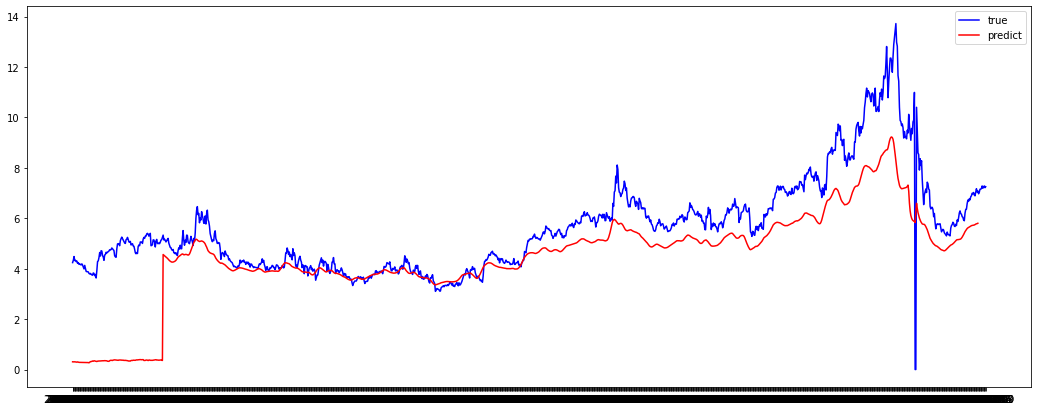

In [11]:
def load_data(df,sequence_length=10, split=0.8):     
    data_all = np.array(df).astype(float)
    scaler = MinMaxScaler()
    data_all = scaler.fit_transform(data_all)
    data = []
    for i in range(len(data_all) - sequence_length - 1):
        data.append(data_all[i: i + sequence_length + 1])
    reshaped_data = np.array(data).astype('float64')
    x = reshaped_data[:, :-1]
    y = reshaped_data[:, -1]
    split_boundary = int(reshaped_data.shape[0] * split)
    train_x = x[: split_boundary]
    test_x = x[split_boundary:]
    train_y = y[: split_boundary]
    test_y = y[split_boundary:]
 
    return train_x, train_y, test_x, test_y, scaler

def history_data(df,sequence_length=10, split=0.8):     
    data_all = np.array(df).astype(float)
    scaler = MinMaxScaler()
    data_all = scaler.fit_transform(data_all)
    data = []
    for i in range(len(data_all) - sequence_length - 1):
        data.append(data_all[i: i + sequence_length + 1])
    reshaped_data = np.array(data).astype('float64')
    x = reshaped_data[:, :-1]
    y = reshaped_data[:, -1]
    split_boundary = int(reshaped_data.shape[0] * split)
    train_x = x[: split_boundary]
    test_x = x[split_boundary:]
    train_y = y[: split_boundary]
    test_y = y[split_boundary:]
 
    return train_x, train_y, test_x, test_y, scaler
 
def build_model():
    # input_dim是输入的train_x的最后一个维度，train_x的维度为(n_samples, time_steps, input_dim)
    model = Sequential()
    model.add(LSTM(50, input_dim=1,return_sequences=True))
    print(model.layers)
    model.add(LSTM(100,return_sequences=False))
    model.add(Dense(1))
    model.add(Activation('linear'))
    model.compile(loss='mse', optimizer='rmsprop')
    return model

def train_model(train_x, train_y, test_x, test_y):
    model = build_model()
    try:
        model.fit(train_x, train_y, batch_size=256,epochs=100, validation_split=0.1)
        predict = model.predict(test_x)
        predict = np.reshape(predict, (predict.size,))
    except KeyboardInterrupt:
        print(predict)
        print(test_y)
    return predict, test_y
 
if __name__ == '__main__':
    data=blt_data
    train_x, train_y, test_x, test_y, scaler=load_data(data, sequence_length=10, split=0.1)
    train_x = np.reshape(train_x, (train_x.shape[0], train_x.shape[1], 1))
    test_x = np.reshape(test_x, (test_x.shape[0], test_x.shape[1], 1))
    predict_y, test_y = train_model(train_x, train_y, test_x, test_y)
    predict_y = scaler.inverse_transform([[i] for i in predict_y])
    test_y = scaler.inverse_transform(test_y)
    fig2 = plt.figure(figsize=(18,7))
    plt.plot(data['Value'],'blue')
    plt.plot(np.append(train_y,predict_y),'red')
    plt.legend(['true','predict'])
    plt.show()

In [ ]:
trades=[[1000,0,0]]
trans_time=14 #换仓周期
a1=0.01 #黄金交易费
a2=0.02 #比特币交易费

for day in range(8,1826):    
    position=trades[-1] #今日仓位
    Wt=position[0]+position[1]+position[2]#今日资产总额
    gold_train=gold_data['Value'][0:day-1]
    bit_train=bit_data['Value'][0:day-1]

    data=gold_data
    train_x, train_y, test_x, test_y, scaler=load_data(data, sequence_length=10, split=0.01)
    train_x = np.reshape(train_x, (train_x.shape[0], train_x.shape[1], 1))
    test_x = np.reshape(test_x, (test_x.shape[0], test_x.shape[1], 1))
    predict_y, test_y = train_model(train_x, train_y, test_x, test_y)
    predict_y = scaler.inverse_transform([[i] for i in predict_y])
    test_y = scaler.inverse_transform(test_y)    
    
    r=np.array([1,])